# CAPSTONE 2
## geospatial data analysis

In [1]:
### import the following packages
import geopandas as gpd
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import geoplot as gplt
import seaborn as sns

In [2]:
##load and clean data

In [3]:
#read in gSSURGO component table. this dataset has [18471 rows x 110 columns]
ok_comp = gpd.read_file("E:/Erin2/gSSURGO_OK/gSSURGO_OK.gdb", layer= 'component')
#check data
#print(ok_comp)

In [ ]:
import fiona
## list layers in geodatabase read in with fiona.listlayers
fiona.listlayers("E:/Erin2/gSSURGO_OK/gSSURGO_OK.gdb")

In [4]:
ok_comp=ok_comp[['comppct_r','compname','majcompflag','slope_l','slope_r','slope_h','elev_l','elev_r','elev_h','airtempa_l','airtempa_r','airtempa_h','map_l','map_r','map_h','ffd_l','ffd_r','ffd_h','taxpartsize','mukey','cokey']]
#view df
#ok_comp

In [5]:
#remove columns with NaN
ok_comp=ok_comp.dropna(axis=0,how='any')

In [6]:
#add new column to convert temp to F
ok_comp["avgtemp"]=((ok_comp["airtempa_r"]*1.8)+32).round(decimals=1)
ok_comp["avgtemp"]

0        55.9
1        55.9
3        55.9
4        55.9
5        55.9
         ... 
18463    61.0
18464    61.0
18465    61.0
18466    60.8
18467    60.8
Name: avgtemp, Length: 17446, dtype: float64

In [7]:
# to csv for analysis outside of python
ok_comp.to_csv('E:/Erin2/capstone_data/ok_comp.csv')

In [8]:
# read component parent material layer
ok_copm=gpd.read_file("E:/Erin2/gSSURGO_OK/gSSURGO_OK.gdb", layer= 'copm')
print(ok_copm.columns.values)

['pmorder' 'pmmodifier' 'pmgenmod' 'pmkind' 'pmorigin' 'copmgrpkey'
 'copmkey' 'geometry']


In [9]:
#count NaN values in df ok_copm
ok_copm.isna().sum()
#remove rows with NaN copm layer
#ok_copm=ok_copm.dropna(axis=0)
#print(ok_copm)

pmorder       14797
pmmodifier     4941
pmgenmod      16356
pmkind          995
pmorigin       9158
copmgrpkey        0
copmkey           0
geometry      23250
dtype: int64

In [10]:
# view columns and first 5 rows
ok_copm.head()

,pmorder,pmmodifier,pmgenmod,pmkind,pmorigin,copmgrpkey,copmkey,geometry
0,NaN,Sandy,calcareous,Alluvium,None,15227859,21501291,None
1,NaN,None,None,Eolian sands,None,15227859,21501292,None
2,NaN,Loamy,calcareous,Alluvium,None,15227838,21501266,None
3,NaN,None,None,Eolian deposits,None,15227838,21501265,None
4,1.0,Silty,Pleistocene,Calcareous loess,None,15227921,21502329,None


In [11]:
#keep specific columns from ok_copm
ok_copm=ok_copm[['pmkind','pmorigin','copmgrpkey']]
#drop rows with NaN
ok_copm=ok_copm.dropna(axis=0, how='any')
ok_copm

,pmkind,pmorigin,copmgrpkey
8,Eolian deposits,Sandstone and shale,15227827
14,Eolian deposits,Sandstone and shale,15227848
19,Eolian deposits,Sandstone and shale,15227826
22,Eolian deposits,Sandstone and shale,15227850
27,Alluvium,Sandstone and shale,15227828
...,...,...,...
23231,Residuum,Shale,15235989
23233,Residuum,Limestone,15235963
23241,Residuum,Shale,15235868
23247,Residuum,Sedimentary rock,15235968


In [12]:
#read in copm group from SSURGO gdb
copmgrp=gpd.read_file("E:/Erin2/gSSURGO_OK/gSSURGO_OK.gdb", layer= 'copmgrp')
copmgrp

,pmgroupname,rvindicator,cokey,copmgrpkey,geometry
0,calcareous loamy colluvium derived from basalt,Yes,20836589,15227821,None
1,calcareous loamy residuum weathered from basalt,Yes,20836590,15227822,None
2,calcareous loamy eolian deposits derived from ...,Yes,20836592,15227823,None
3,loamy alluvium derived from sandstone and shale,Yes,20836593,15227824,None
4,loamy alluvium and/or eolian deposits derived ...,Yes,20836594,15227825,None
...,...,...,...,...,...
18079,residuum weathered from sandstone and siltstone,Yes,20845687,15236053,None
18080,clayey residuum weathered from limestone,Yes,20845688,15236054,None
18081,loamy residuum weathered from limestone,Yes,20845689,15236055,None
18082,loamy slope alluvium,Yes,20845690,15236056,None


In [13]:
#inner join copmgrp & ok_copm on cokey and copmkey
ok_pm=ok_copm.merge(copmgrp, on='copmgrpkey')
ok_pm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13537 entries, 0 to 13536
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   pmkind       13537 non-null  object  
 1   pmorigin     13537 non-null  object  
 2   copmgrpkey   13537 non-null  object  
 3   pmgroupname  13537 non-null  object  
 4   rvindicator  13537 non-null  object  
 5   cokey        13537 non-null  object  
 6   geometry     0 non-null      geometry
dtypes: geometry(1), object(6)
memory usage: 846.1+ KB


In [14]:
#drop geometry column so df can be joined to ok_soil
ok_pm=ok_pm.drop(columns=['geometry'])
ok_pm

,pmkind,pmorigin,copmgrpkey,pmgroupname,rvindicator,cokey
0,Eolian deposits,Sandstone and shale,15227827,calcareous loamy eolian deposits derived from ...,Yes,20836596
1,Eolian deposits,Sandstone and shale,15227848,loamy alluvium and/or eolian deposits derived ...,Yes,20836618
2,Eolian deposits,Sandstone and shale,15227826,loamy alluvium and/or eolian deposits derived ...,Yes,20836595
3,Eolian deposits,Sandstone and shale,15227850,calcareous loamy eolian deposits derived from ...,Yes,20836620
4,Alluvium,Sandstone and shale,15227828,loamy alluvium derived from sandstone and shale,Yes,20836597
...,...,...,...,...,...,...
13532,Residuum,Shale,15235989,clayey residuum weathered from shale,Yes,20845086
13533,Residuum,Limestone,15235963,calcareous loamy residuum weathered from limes...,Yes,20844527
13534,Residuum,Shale,15235868,clayey residuum weathered from shale,Yes,20844432
13535,Residuum,Sedimentary rock,15235968,clayey and/or loamy alluvium over residuum we...,Yes,20844532


In [28]:
# to csv for analysis outside of python
ok_pm.to_csv('E:/Erin2/capstone_data/ok_pm.csv')

In [15]:
#inner join component PM and component 
ok_soil=ok_comp.merge(ok_pm, on='cokey')
print(ok_soil.columns.values)
ok_soil.shape

['comppct_r' 'compname' 'majcompflag' 'slope_l' 'slope_r' 'slope_h'
 'elev_l' 'elev_r' 'elev_h' 'airtempa_l' 'airtempa_r' 'airtempa_h' 'map_l'
 'map_r' 'map_h' 'ffd_l' 'ffd_r' 'ffd_h' 'taxpartsize' 'mukey' 'cokey'
 'avgtemp' 'pmkind' 'pmorigin' 'copmgrpkey' 'pmgroupname' 'rvindicator']


(13298, 27)

In [16]:
#read in geometry for component data MUPOLYGON
mupolygon=gpd.read_file("E:/Erin2/gSSURGO_OK/gSSURGO_OK.gdb", layer= 'MUPOLYGON')
mupolygon

,AREASYMBOL,SPATIALVER,MUSYM,MUKEY,Shape_Length,Shape_Area,geometry
0,OK025,4.0,Db,382056,4859.642770,3.841120e+05,"MULTIPOLYGON (((-536169.000 1558883.800, -5361..."
1,OK025,4.0,Pb,382068,4374.347365,4.238759e+05,"MULTIPOLYGON (((-618266.700 1531628.500, -6182..."
2,OK025,4.0,Db,382056,934.864706,3.950381e+04,"MULTIPOLYGON (((-601991.300 1531382.700, -6020..."
3,OK025,4.0,Mc,382063,45863.917538,8.807567e+06,"MULTIPOLYGON (((-602223.800 1556194.300, -6022..."
4,OK025,4.0,Ta,382078,1566.806486,5.414866e+04,"MULTIPOLYGON (((-584019.300 1559248.900, -5840..."
...,...,...,...,...,...,...,...
791928,OK085,4.0,DcD,383703,2486.214659,2.404003e+05,"MULTIPOLYGON (((-98757.400 1209855.000, -98761..."
791929,OK085,4.0,De,383705,1917.276039,7.630176e+04,"MULTIPOLYGON (((-97734.900 1210402.200, -97753..."
791930,OK085,4.0,WsD,383761,444.929925,9.663895e+03,"MULTIPOLYGON (((-117236.300 1211068.500, -1172..."
791931,OK085,4.0,DdC,383704,909.339927,4.823434e+04,"MULTIPOLYGON (((-111224.000 1212974.300, -1112..."


In [17]:
#join geo df (muploygon) to pf df (ok_comp)
#create gpd df
ok_soil=mupolygon.merge(ok_soil, left_on='MUKEY', right_on='mukey')
#drop columns not needed
ok_soil=gpd.GeoDataFrame(ok_soil.drop(columns=["mukey","rvindicator"]))
#ok_soil

In [18]:
#read in geometry for SSA data sapolygon
sapolygon=gpd.read_file("E:/Erin2/gSSURGO_OK/gSSURGO_OK.gdb", layer= 'sapolygon')
sapolygon

,AREASYMBOL,SPATIALVER,LKEY,Shape_Length,Shape_Area,geometry
0,OK025,4.0,13105,284081.789515,4.768178e+09,"MULTIPOLYGON (((-594506.500 1571916.700, -5943..."
1,OK139,7.0,13155,303279.746403,5.304684e+09,"MULTIPOLYGON (((-435825.800 1561928.400, -4358..."
2,OK007,5.0,13097,280395.370838,4.705954e+09,"MULTIPOLYGON (((-360393.200 1558764.400, -3602..."
3,OK059,4.0,13123,209615.750379,2.697020e+09,"MULTIPOLYGON (((-338276.200 1557737.800, -3382..."
4,OK151,3.0,13158,275812.998949,3.340187e+09,"MULTIPOLYGON (((-291251.500 1555783.300, -2909..."
...,...,...,...,...,...,...
72,OK067,6.0,13126,219668.362551,2.045928e+09,"MULTIPOLYGON (((-186876.700 1249366.300, -1865..."
73,OK095,4.0,13137,181802.439898,1.106428e+09,"MULTIPOLYGON (((-88588.600 1234750.700, -88376..."
74,OK013,8.0,13101,314476.708730,2.441574e+09,"MULTIPOLYGON (((-38577.400 1232646.000, -38085..."
75,OK023,5.0,14991,257396.521088,2.070777e+09,"MULTIPOLYGON (((52981.000 1232691.700, 53223.8..."


In [22]:
ok013=sapolygon[sapolygon["AREASYMBOL"]=="OK013"]
ok013

,AREASYMBOL,SPATIALVER,LKEY,Shape_Length,Shape_Area,geometry
74,OK013,8.0,13101,314476.70873,2.441574e+09,"MULTIPOLYGON (((-38577.400 1232646.000, -38085..."


In [23]:
ok113= gpd.GeoDataFrame(sapolygon[sapolygon["AREASYMBOL"]=="OK113"])

In [24]:
# ok_soil info from within SSA ok013
soil_113=gpd.sjoin(ok_soil, ok113, how='inner', predicate='intersects')

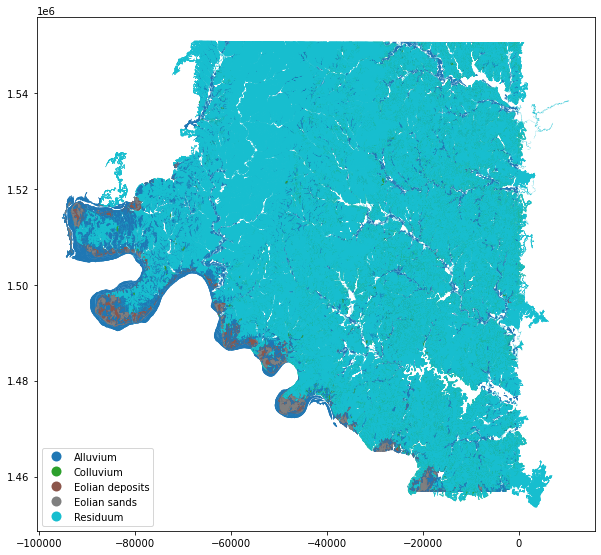

In [45]:
#plot SSA soil_013
soil_113.plot("pmkind", figsize= (10,10), legend=True, legend_kwds={'loc':'lower left'})
plt.savefig('E:/Erin2/capstone_data/pmkind_113.jpg')

In [67]:
# ok_soil info from within SSA ok013
soil_113=gpd.sjoin(ok_soil, ok113, how='inner', predicate='intersects')

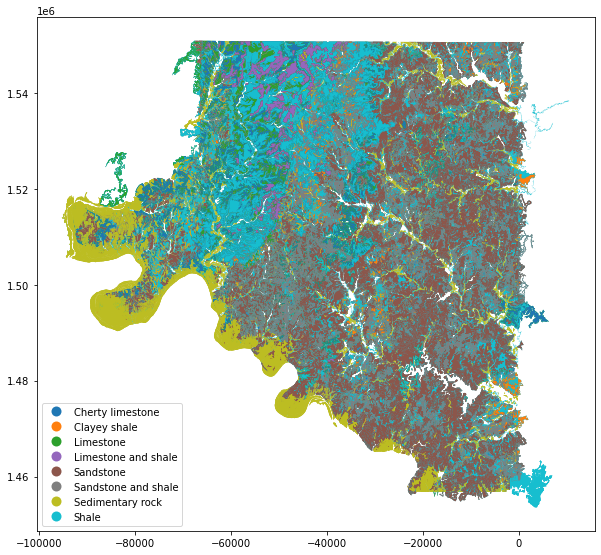

In [44]:
#plot SSA soil_013
soil_113.plot("pmorigin", figsize= (10,10), legend=True, legend_kwds={'loc':'lower left'})
plt.savefig('E:/Erin2/capstone_data/pmorigin_113.jpg')

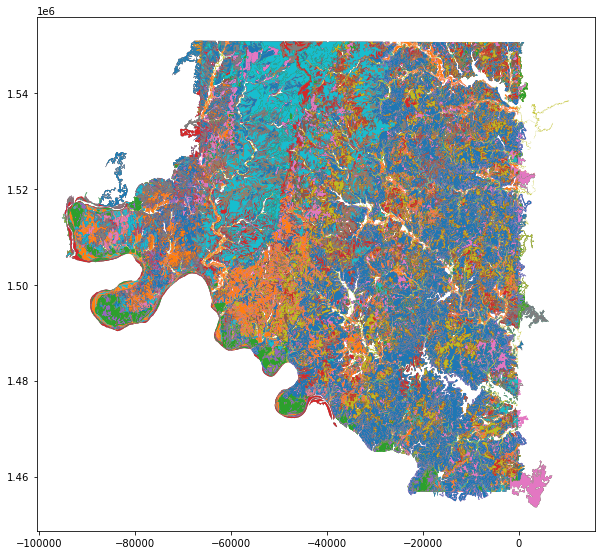

In [105]:
#plot SSA soil_013 comp name
soil_113.plot("compname", figsize= (10,10))#legend=True, legend_kwds={'loc':'lower left'})
plt.savefig('E:/Erin2/capstone_data/compname.jpg')

In [36]:
display(soil_113["compname"].value_counts())

Niotaze         9504
Steedman        8117
Lucien          5989
Coyle           5843
Bartlesville    5341
                ... 
Dale               1
Brewer             1
Reinach            1
Navina             1
Clareson           1
Name: compname, Length: 83, dtype: int64

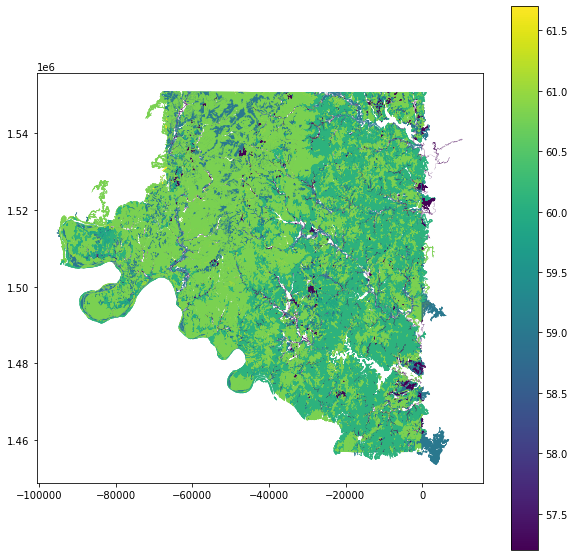

In [69]:
soil_113.plot("avgtemp", figsize= (10,10), legend=True)
plt.savefig('E:/Erin2/capstone_data/airtemp_113.jpg')

In [25]:
soil_113[["avgtemp"]].describe().round(decimals=1)

,avgtemp
count,105165.0
mean,60.2
std,0.8
min,57.2
25%,60.1
50%,60.1
75%,60.8
max,61.7


In [48]:
#read max temp geodata base with gpd.read
oktemp_max1981 = gpd.read_file("E:/Erin2/temp_ok/climate_TEMPMA1_ok_1981_2010_07/climate/temperature/tempmax1981_2010_a_ok.gdb")
oktemp_min1981 = gpd.read_file("E:/Erin2/temp_ok/climate_TEMPMI1_ok_1981-2010_06/climate/temperature/tempmin1981_2010_a_ok.gdb")
#convert CRS to match soils
oktemp_max1981= oktemp_max1981.to_crs(5070)
oktemp_min1981 = oktemp_min1981.to_crs(5070)

In [103]:
#to csv for analysis outside of python
oktemp_max1981.to_csv('E:/Erin2/capstone_data/tempmax.csv')
oktemp_min1981.to_csv('E:/Erin2/capstone_data/tempmax.csv')

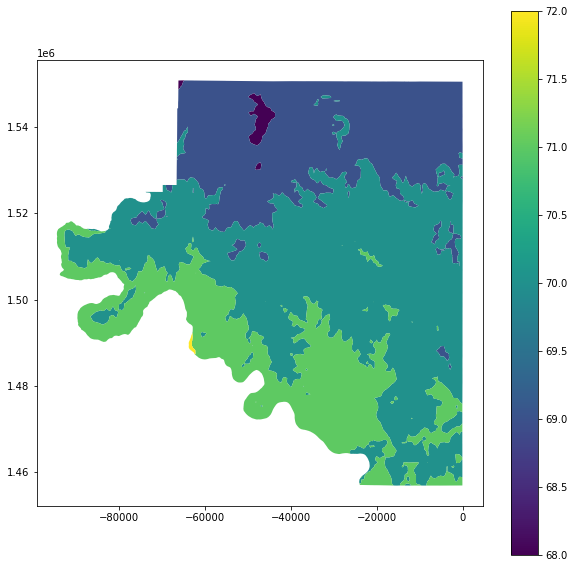

In [70]:
oktemp_max1981.clip(ok113).plot('TempMax', legend=True, figsize= (10,10))
plt.savefig('E:/Erin2/capstone_data/tempmax_013.jpg')

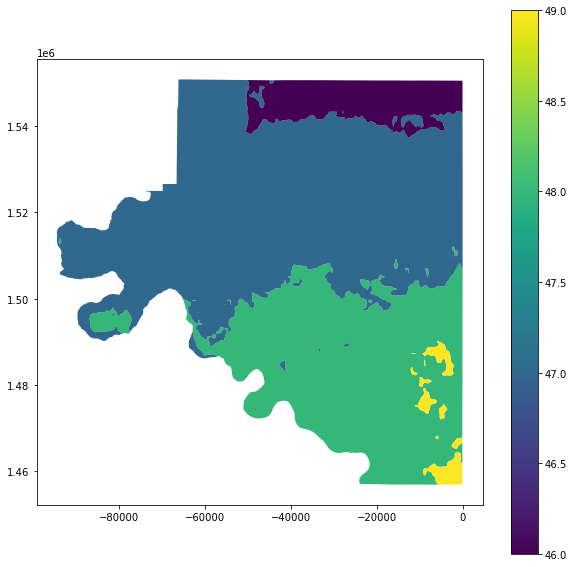

In [71]:
oktemp_min1981.clip(ok113).plot('TempMin', legend=True, figsize= (10,10))
plt.savefig('E:/Erin2/capstone_data/tempmin_113.jpg')

In [16]:
ok_soil.isna().sum()
ok_soil.shape

(2490202, 31)

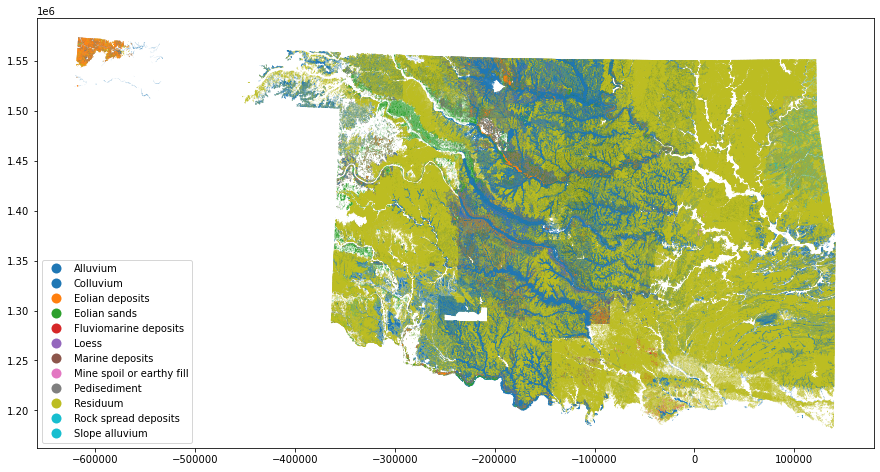

In [31]:
ok_soil.plot("pmkind", figsize= (15,15), legend=True, legend_kwds={'loc': 'lower left'})
plt.savefig('E:/Erin2/capstone_data/ok_pmkind.jpg')

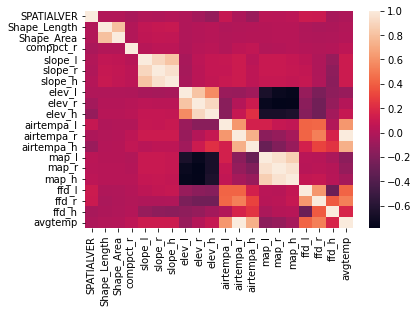

In [80]:
ok_soil_corr=ok_soil.corr()
sns.heatmap(ok_soil_corr)
plt.savefig(('E:/Erin2/capstone_data/corr.jpg'))

In [71]:
#filter out minorcompflag = No
ok_soil=ok_soil[ok_soil['majcompflag']=='Yes']
ok_soil.shape

(916900, 31)

In [25]:
## notes and exploration

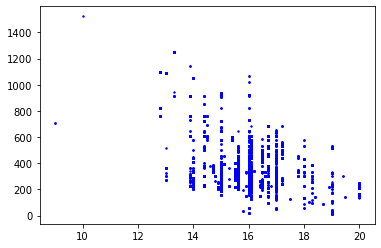

In [38]:
# create list from df column
x=ok_comp['airtempa_r'].tolist()
y=ok_comp['elev_r'].tolist()
#scatter plot MAP and elevation
plt.scatter(x,y,s=2, c='blue')

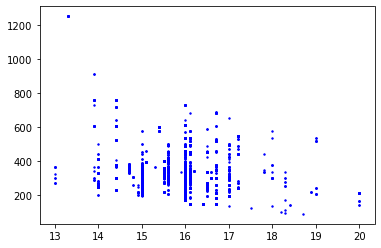

In [74]:
# create list from df column
x=ok_soil['airtempa_r'].tolist()
y=ok_soil['elev_r'].tolist()
#scatter plot MAP and elevation
plt.scatter(x,y,s=2, c='blue')

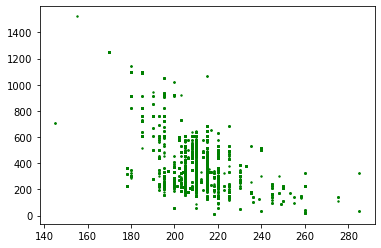

In [59]:
# create list from df column
x=ok_comp['ffd_r'].tolist()
y=ok_comp['elev_r'].tolist()
#scatter plot MAP and elevation
plt.scatter(x,y,s=2, c='green')

<AxesSubplot:>

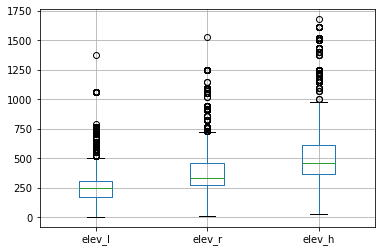

In [61]:
#Make a box plot from DataFrame columns
ok_comp.boxplot(column=['elev_l', 'elev_r', 'elev_h'])